In [109]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [110]:
#show all columns
pd.set_option('display.max_columns', None)

In [111]:
post_op_df = pd.read_excel('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/post_op.xlsx', header=None)
post_op = post_op_df[0].tolist()
dpost_op_df = pd.read_excel('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dpost_op.xlsx', header=None)
dpost_op = dpost_op_df[0].tolist()

In [112]:
for i in range(len(post_op)):
    if post_op[i][-1] == ' ':
        post_op[i] = post_op[i][:-1]

In [113]:
for i in range(len(dpost_op)):
    if dpost_op[i][-1] == ' ':
        dpost_op[i] = dpost_op[i][:-1]

#added?: 'WGT_HIGH_BAR', 'WGT_HIGH_UNIT_BAR', 'BMI', 'BMI_HIGH_BAR', 'WGT_CLOSEST', 'WGTUNIT_CLOSEST', 'HEMO', 'PREVIOUS_SURGERY', 'CREATININE', 'PROCEDURE_TYPE', 
        'STAPLING_PROC', 'DTOP', 
Added:  'DTREAD', 'READ_DIAGNOSIS',
Could not add: 'REOP_CPT', 'DTREOP', 'REOP_DIAGNOSIS', 'DTINTV', 'INTV_DIAGNOSIS']
#removed: 'ASSISTANT_TRAINING_LEVEL','MOBILITY_DEVICE', 'OXYGEN_DEPENDENT'

In [114]:
USE_VARS = ['WGT_HIGH_BAR', 'WGT_HIGH_UNIT_BAR', 'BMI', 'BMI_HIGH_BAR', 'WGT_CLOSEST', 'WGTUNIT_CLOSEST', 'HEMO', 'PREVIOUS_SURGERY', 'CREATININE', 'PROCEDURE_TYPE', 
            'STAPLING_PROC', 'DTOP', 'ASSISTANT_TRAINING_LEVEL', 'MOBILITY_DEVICE', 'OXYGEN_DEPENDENT',
            'OTHCPT1', 'OTHCPT2','OTHCPT3','OTHCPT4','OTHCPT5','OTHCPT6','OTHCPT7','OTHCPT8','OTHCPT9','OTHCPT10',
            'CONCPT1', 'CONCPT2', 'CONCPT3', 'CONCPT4', 'CONCPT5', 'CONCPT6', 'CONCPT7', 'CONCPT8', 'CONCPT9', 'CONCPT10',
            'SEX', 'AGE', 'RACE_PUF', 'HISPANIC', 'CPT', 'MOBILITY_DEVICE', 'HISTORY_DVT', 'MI_ALL_HISTORY', 'PTC', 'PCARD', 'HIP', 'NBHTN_MEDS', 'HYPERLIPIDEMIA', 
            'VENOUS_STASIS', 'DIALYSIS', 'RENAL_INSUFFICIENCY', 'THERAPEUTIC_ANTICOAGULATION', 'DIABETES', 'SMOKER', 'FUNSTATPRESURG', 'COPD', 
            'HISTORY_PE', 'SLEEP_APNEA', 'CHRONIC_STEROIDS', 'ASACLASS', 'OPYEAR', 'OPLENGTH', 'ALBUMIN', 'HCT', 'READ30', 'DISCHARGE_DESTINATION', 'DTDISCH_OP', 
            'SURGICAL_APPROACH', 'ROBOTIC_ASST', 'APPROACH_CONVERTED', 'DRAIN_PLACED', 'ANASTOMOSIS_CHECKED', 'DTREAD', 'READ_DIAGNOSIS', 
            ]
incl = post_op + dpost_op + USE_VARS

In [115]:
#strip ' ' from the end of each string
for i in range(len(incl)):
    if incl[i][-1] == ' ':
        incl[i] = incl[i][:-1]

In [116]:
data = pd.read_csv('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/mbsaqip_total.csv', usecols=incl)

/var/folders/5n/nj9s10v14nvccchdnmlzcdwr0000gn/T/ipykernel_7728/435974990.py:1: DtypeWarning: Columns (16,41,51,65,66,67,68,69,70,75,76,77,107,108,110,120,121,169,207,208,209,217,219,254) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/mbsaqip_total.csv', usecols=incl)


In [117]:
data.shape

(1149481, 107)

In [118]:
data.head()

,SEX,AGE,CPT,STAPLING_PROC,MOBILITY_DEVICE,MI_ALL_HISTORY,PTC,PCARD,HIP,HYPERLIPIDEMIA,WGT_HIGH_BAR,WGT_HIGH_UNIT_BAR,WGT_CLOSEST,WGTUNIT_CLOSEST,BMI,BMI_HIGH_BAR,HISTORY_DVT,VENOUS_STASIS,DIALYSIS,RENAL_INSUFFICIENCY,THERAPEUTIC_ANTICOAGULATION,PREVIOUS_SURGERY,DIABETES,SMOKER,FUNSTATPRESURG,COPD,OXYGEN_DEPENDENT,HISTORY_PE,SLEEP_APNEA,CHRONIC_STEROIDS,ALBUMIN,HCT,ASSISTANT_TRAINING_LEVEL,SURGICAL_APPROACH,APPROACH_CONVERTED,DRAIN_PLACED,ANASTOMOSIS_CHECKED,ASACLASS,OTHCPT1,OTHCPT2,OTHCPT3,OTHCPT4,OTHCPT5,OTHCPT6,OTHCPT7,OTHCPT8,OTHCPT9,OTHCPT10,CONCPT1,CONCPT2,CONCPT3,CONCPT4,CONCPT5,CONCPT6,CONCPT7,CONCPT8,CONCPT9,CONCPT10,DTOP,DTDISCH_OP,OPYEAR,OPLENGTH,POSTOPDEEPINCISIONALSSI,POSTOPORGANSPACESSI,POSTOPPNEUMONIA,PULMONARYEMBOLSM,POSTOPSEPSIS,POSTOPSEPTICSHOCK,POSTOPSUPERFICIALINCISIONALSSI,TRANSFINTOPPSTOP,POSTOPUTI,WOUNDDISRUPTION,UNPLANNEDADMISSIONICU30,DISCHARGE_DESTINATION,REOP30,READ30,INTV30,DTREAD,DTINTV,DTREOP,CDIFF,DTPOSTOPDEEPINCISIONALSSI,DTPOSTOPORGANSPACESSI,DTPOSTOPPNEUMONIA,DTPOSTOPSEPSIS,DTPOSTOPSEPTICSHOCK,DTPOSTOPUTI,DTWOUNDDISRUPTION,DTPULMONARYEMBOLSM,DTTRANSFINTOPPSTOP,DTCDIFF,CREATININE,HEMO,RACE_PUF,HISPANIC,PROCEDURE_TYPE,NBHTN_MEDS,ROBOTIC_ASST,POSTOPANASTSLLEAK,GITRACTBLEED,BOWELOBSTRUCTION,DTPOSTOPSUPERFINCSSI,DTANASTSLLEAK,DTUNPLANADMICU,DTGITRACTBLEED,DTBOWELOBSTRUCTION,READ_DIAGNOSIS
0,Female,26.0,43644,Yes,No,No,No,No,No,No,449.0,lbs,190.1,kg,76.49,82.11,No,No,No,No,No,No,No,No,Independent,No,No,No,Yes,No,NaN,34.7,Resident (PGY 1-5+),Conventional laparoscopic (thoracoscopic),No,Yes,Yes,3-Severe Disturb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2015,162.0,0,0,0,No,0,0,0,No,0,No,No,Home,Yes,Yes,Yes,22.0,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,47.0,43644,Yes,No,No,No,No,Yes,No,129.0,kg,125.0,kg,39.45,40.72,No,No,No,No,No,No,Insulin,No,Independent,No,No,No,Yes,No,3.8,39.7,Minimally Invasive Surgery Fellow,Conventional laparoscopic (thoracoscopic),No,Yes,Yes,3-Severe Disturb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2015,187.0,0,0,0,No,0,0,0,No,0,No,No,Home,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,53.0,43644,Yes,No,No,No,No,No,No,115.0,kg,113.0,kg,46.97,47.80,No,No,No,No,No,No,Non-Insulin,No,Independent,No,No,No,No,No,3.8,35.0,Resident (PGY 1-5+),Conventional laparoscopic (thoracoscopic),No,Yes,Yes,3-Severe Disturb,47001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2015,126.0,0,0,0,No,0,0,0,No,0,No,No,Home,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,41.0,43860,Yes,No,No,No,No,No,No,147.0,lbs,147.0,lbs,27.77,27.77,No,No,No,No,No,Yes,No,No,Independent,No,No,No,No,No,NaN,33.0,Minimally Invasive Surgery Fellow,Conventional laparoscopic (thoracoscopic),No,Yes,Yes,2-Mild Disturb,49654.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,2015,258.0,0,0,0,No,0,0,0,No,0,No,No,Home,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,37.0,43860,Yes,No,No,No,No,No,No,150.0,lbs,150.0,lbs,20.92,20.92,No,No,No,No,No,Yes,No,Yes,Independent,No,No,No,No,No,NaN,31.9,Minimally Invasive Surgery Fellow,Conventional laparoscopic (thoracoscopic),No,Yes,Yes,2-Mild Disturb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,2015,285.0,0,0,0,No,0,0,0,No,0,No,No,Home,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
data['OTHCPT1'] = data['OTHCPT1'].astype(str)
data['OTHCPT2'] = data['OTHCPT2'].astype(str)
data['OTHCPT3'] = data['OTHCPT3'].astype(str)
data['OTHCPT4'] = data['OTHCPT4'].astype(str)
data['OTHCPT5'] = data['OTHCPT5'].astype(str)
data['OTHCPT6'] = data['OTHCPT6'].astype(str)
data['OTHCPT7'] = data['OTHCPT7'].astype(str)
data['OTHCPT8'] = data['OTHCPT8'].astype(str)
data['OTHCPT9'] = data['OTHCPT9'].astype(str)
data['OTHCPT10'] = data['OTHCPT10'].astype(str)
data['CONCPT1'] = data['CONCPT1'].astype(str)
data['CONCPT2'] = data['CONCPT2'].astype(str)
data['CONCPT3'] = data['CONCPT3'].astype(str)
data['CONCPT4'] = data['CONCPT4'].astype(str)
data['CONCPT5'] = data['CONCPT5'].astype(str)
data['CONCPT6'] = data['CONCPT6'].astype(str)
data['CONCPT7'] = data['CONCPT7'].astype(str)
data['CONCPT8'] = data['CONCPT8'].astype(str)
data['CONCPT9'] = data['CONCPT9'].astype(str)
data['CONCPT10'] = data['CONCPT10'].astype(str)


In [120]:
data['LOA'] = 0
loa = [44180]
for CPT in loa:
    data.loc[data['CPT'] == CPT, 'LOA'] = 1
print(data['LOA'].value_counts(dropna=False))

str_loa = []
for x in loa:
    str_loa.append(str(x))
for i in range(1,11):
    for CPT in str_loa:
        data.loc[data['OTHCPT%s' % i].str.contains(CPT, na=False), 'LOA'] = 1
        data.loc[data['CONCPT%s' % i].str.contains(CPT, na=False), 'LOA'] = 1
data['LOA'].value_counts(dropna=False)


0    1149481
Name: LOA, dtype: int64


0    1086325
1      63156
Name: LOA, dtype: int64

In [121]:
data['EGD'] = 0
egd = [43235, 43239, 43200]
for CPT in egd:
    data.loc[data['CPT'] == CPT, 'EGD'] = 1
print(data['EGD'].value_counts(dropna=False))

str_egd = []
for x in egd:
    str_egd.append(str(x))
for i in range(1,11):
    for CPT in str_egd:
        data.loc[data['OTHCPT%s' % i].str.contains(CPT, na=False), 'EGD'] = 1
        data.loc[data['CONCPT%s' % i].str.contains(CPT, na=False), 'EGD'] = 1
data['EGD'].value_counts(dropna=False)


0    1149481
Name: EGD, dtype: int64


0    910972
1    238509
Name: EGD, dtype: int64

In [122]:
data['PARAESOPHAGEAL_HERNIA_REPAIR'] = 0
para = [43281, 43332, 43282]
for CPT in para:
    data.loc[data['CPT'] == CPT, 'PARAESOPHAGEAL_HERNIA_REPAIR'] = 1
print(data['PARAESOPHAGEAL_HERNIA_REPAIR'].value_counts(dropna=False))

str_para = []
for x in para:
    str_para.append(str(x))
for i in range(1,11):
    for CPT in str_para:
        data.loc[data['OTHCPT%s' % i].str.contains(CPT, na=False), 'PARAESOPHAGEAL_HERNIA_REPAIR'] = 1
        data.loc[data['CONCPT%s' % i].str.contains(CPT, na=False), 'PARAESOPHAGEAL_HERNIA_REPAIR'] = 1
data['PARAESOPHAGEAL_HERNIA_REPAIR'].value_counts(dropna=False)


0    1145695
1       3786
Name: PARAESOPHAGEAL_HERNIA_REPAIR, dtype: int64


0    950349
1    199132
Name: PARAESOPHAGEAL_HERNIA_REPAIR, dtype: int64

In [123]:
data['REMOVAL_GASTRIC_BAND'] = 0
removgasband = [43774]
for CPT in removgasband:
    data.loc[data['CPT'] == CPT, 'REMOVAL_GASTRIC_BAND'] = 1
print(data['REMOVAL_GASTRIC_BAND'].value_counts(dropna=False))

str_removgasband = []
for x in removgasband:
    str_removgasband.append(str(x))
for i in range(1,11):
    for CPT in str_removgasband:
        data.loc[data['OTHCPT%s' % i].str.contains(CPT, na=False), 'REMOVAL_GASTRIC_BAND'] = 1
        data.loc[data['CONCPT%s' % i].str.contains(CPT, na=False), 'REMOVAL_GASTRIC_BAND'] = 1
data['REMOVAL_GASTRIC_BAND'].value_counts(dropna=False)


0    1105496
1      43985
Name: REMOVAL_GASTRIC_BAND, dtype: int64


0    1077935
1      71546
Name: REMOVAL_GASTRIC_BAND, dtype: int64

In [124]:
data['LAP_CHOLE'] = 0
lapchole = [47562]
for CPT in lapchole:
    data.loc[data['CPT'] == CPT, 'LAP_CHOLE'] = 1
print(data['LAP_CHOLE'].value_counts(dropna=False))

str_lapchole = []
for x in lapchole:
    str_lapchole.append(str(x))
for i in range(1,11):
    for CPT in str_lapchole:
        data.loc[data['OTHCPT%s' % i].str.contains(CPT, na=False), 'LAP_CHOLE'] = 1
        data.loc[data['CONCPT%s' % i].str.contains(CPT, na=False), 'LAP_CHOLE'] = 1
data['LAP_CHOLE'].value_counts(dropna=False)


0    1149481
Name: LAP_CHOLE, dtype: int64


0    1125742
1      23739
Name: LAP_CHOLE, dtype: int64

In [125]:
data['NERVE_BLOCK'] = 0
nerveblock = [64488, 64486]
for CPT in nerveblock:
    data.loc[data['CPT'] == CPT, 'NERVE_BLOCK'] = 1
print(data['NERVE_BLOCK'].value_counts(dropna=False))

str_nerveblock = []
for x in nerveblock:
    str_nerveblock.append(str(x))
for i in range(1,11):
    for CPT in str_nerveblock:
        data.loc[data['OTHCPT%s' % i].str.contains(CPT, na=False), 'NERVE_BLOCK'] = 1
        data.loc[data['CONCPT%s' % i].str.contains(CPT, na=False), 'NERVE_BLOCK'] = 1
data['NERVE_BLOCK'].value_counts(dropna=False)


0    1149481
Name: NERVE_BLOCK, dtype: int64


0    1115743
1      33738
Name: NERVE_BLOCK, dtype: int64

In [126]:
data['LIVER_BIOPSY'] = 0
liverbiop = [47100, 47001, 47379]
for CPT in liverbiop:
    data.loc[data['CPT'] == CPT, 'LIVER_BIOPSY'] = 1
print(data['LIVER_BIOPSY'].value_counts(dropna=False))

str_liverbiop = []
for x in liverbiop:
    str_liverbiop.append(str(x))
for i in range(1,11):
    for CPT in str_liverbiop:
        data.loc[data['OTHCPT%s' % i].str.contains(CPT, na=False), 'LIVER_BIOPSY'] = 1
        data.loc[data['CONCPT%s' % i].str.contains(CPT, na=False), 'LIVER_BIOPSY'] = 1
data['LIVER_BIOPSY'].value_counts(dropna=False)


0    1149481
Name: LIVER_BIOPSY, dtype: int64


0    1084848
1      64633
Name: LIVER_BIOPSY, dtype: int64

In [127]:
data['OMENTUM_FLAP'] = 0
omentumflap = [49905]
for CPT in omentumflap:
    data.loc[data['CPT'] == CPT, 'OMENTUM_FLAP'] = 1
print(data['OMENTUM_FLAP'].value_counts(dropna=False))

str_omentumflap = []
for x in omentumflap:
    str_omentumflap.append(str(x))
for i in range(1,11):
    for CPT in str_omentumflap:
        data.loc[data['OTHCPT%s' % i].str.contains(CPT, na=False), 'OMENTUM_FLAP'] = 1
        data.loc[data['CONCPT%s' % i].str.contains(CPT, na=False), 'OMENTUM_FLAP'] = 1
data['OMENTUM_FLAP'].value_counts(dropna=False)

0    1149481
Name: OMENTUM_FLAP, dtype: int64


0    1140081
1       9400
Name: OMENTUM_FLAP, dtype: int64

#list CPT codes including fundoomy placement and create column 'fundo' marking fundoomy
data['fundo'] = 0
fundo = [99999]
for CPT in fundo:
    data.loc[data['CPT'] == CPT, 'fundo'] = 1
data['fundo'].value_counts(dropna=False)
#create a list of CPT's as strings and search other+concurrent CPT for those
str_fundo = []
for x in fundo:  
    str_fundo.append(str(x))
for i in range(1,11):
    for CPT in str_fundo:
        data.loc[data['OTHERCPT%s' % i].str.contains(CPT, na=False), 'fundo'] = 1
        data.loc[data['CONCPT%s' % i].str.contains(CPT, na=False), 'fundo'] = 1
data['fundo'].value_counts(dropna=False)

Write code to convert lbs to kg
Write code to drop the kg column to not include in model 

In [128]:
data.to_csv('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput/data2.csv', index=False)

<AxesSubplot:>

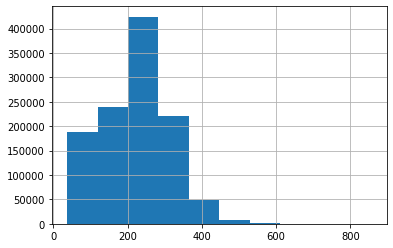

In [129]:
data['WGT_CLOSEST'].hist()

In [130]:
data['WGT_HIGH_UNIT_BAR'].value_counts()

lbs    871452
kg     207650
Name: WGT_HIGH_UNIT_BAR, dtype: int64

In [131]:
#if WGT_HIGH_UNIT_BAR is 'lb', convert WGT_HIGH_BAR to kg
for x in data.index:
    if data['WGT_HIGH_UNIT_BAR'][x] == 'lbs':
        data['WGT_HIGH_BAR'][x] = data['WGT_HIGH_BAR'][x] * 0.453592


/var/folders/5n/nj9s10v14nvccchdnmlzcdwr0000gn/T/ipykernel_7728/691368974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WGT_HIGH_BAR'][x] = data['WGT_HIGH_BAR'][x] * 0.453592


In [132]:
#if WGTUNIT_CLOSEST is 'lb', convert WGT_CLOSEST to kg
for x in data.index:
    if data['WGTUNIT_CLOSEST'][x] == 'lbs':
        data['WGT_CLOSEST'][x] = data['WGT_CLOSEST'][x] * 0.453592

/var/folders/5n/nj9s10v14nvccchdnmlzcdwr0000gn/T/ipykernel_7728/831370829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WGT_CLOSEST'][x] = data['WGT_CLOSEST'][x] * 0.453592


<AxesSubplot:>

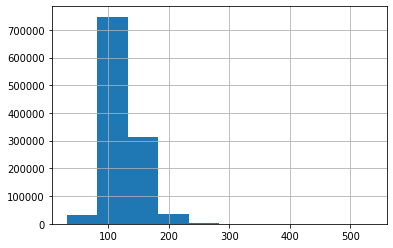

In [133]:
data['WGT_CLOSEST'].hist()

<AxesSubplot:>

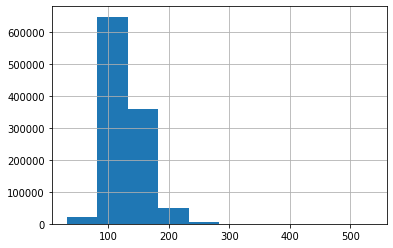

In [134]:
data['WGT_HIGH_BAR'].hist()

In [135]:
drop = ['WGT_HIGH_UNIT_BAR', 'WGTUNIT_CLOSEST']
data.drop(drop, axis=1, inplace=True)

In [136]:
drop = ['OTHCPT1', 'OTHCPT2', 'OTHCPT3', 'OTHCPT4', 'OTHCPT5', 'OTHCPT6', 'OTHCPT7', 'OTHCPT8', 'OTHCPT9', 'OTHCPT10', 'CONCPT1', 'CONCPT2', 'CONCPT3', 'CONCPT4', 'CONCPT5', 'CONCPT6', 'CONCPT7', 'CONCPT8', 'CONCPT9', 'CONCPT10']
data.drop(drop, axis=1, inplace=True)

In [137]:
data.shape

(1149481, 93)

In [138]:
data['WGT_HIGH_BAR'].value_counts(dropna=False)

NaN           70379
113.398000     5699
117.933920     5596
122.469840     5174
108.862080     5108
              ...  
188.354078        1
186.766506        1
288.970000        1
67.860000         1
123.295377        1
Name: WGT_HIGH_BAR, Length: 20248, dtype: int64

<AxesSubplot:>

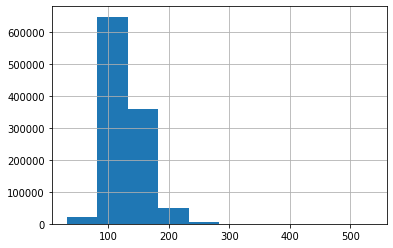

In [139]:
data['WGT_HIGH_BAR'].hist()

In [140]:
data['WGT_CLOSEST'].value_counts(dropna=False)

NaN           18237
113.398000     5708
108.862080     5605
117.933920     5360
104.326160     4948
              ...  
103.880000        1
99.422830         1
163.590000        1
214.450000        1
211.097181        1
Name: WGT_CLOSEST, Length: 21733, dtype: int64

In [142]:
data['WEIGHT_DIFFERENCE'] = data['WGT_HIGH_BAR'] - data['WGT_CLOSEST']

In [144]:
data['WEIGHT_DIFFERENCE'].value_counts()

0.000000     201246
0.907184      14783
1.814368      14015
2.721552      12548
3.628736      10970
              ...  
4.285414          1
14.240419         1
4.113417          1
3.784154          1
6.036656          1
Name: WEIGHT_DIFFERENCE, Length: 114716, dtype: int64

<AxesSubplot:>

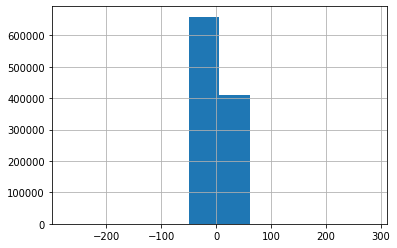

In [145]:
data['WEIGHT_DIFFERENCE'].hist()

In [147]:
data.loc[data['WEIGHT_DIFFERENCE'] > 100, 'WEIGHT_DIFFERENCE'] = np.NaN
data.loc[data['WEIGHT_DIFFERENCE'] < -100, 'WEIGHT_DIFFERENCE'] = np.NaN

<AxesSubplot:>

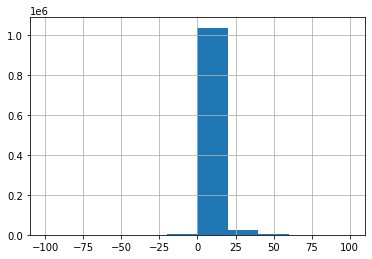

In [149]:
data['WEIGHT_DIFFERENCE'].hist()

In [150]:
data['WEIGHT_DIFFERENCE'].value_counts()

0.000000     201246
0.907184      14783
1.814368      14015
2.721552      12548
3.628736      10970
              ...  
11.466080         1
8.871384          1
7.664952          1
8.337920          1
6.036656          1
Name: WEIGHT_DIFFERENCE, Length: 113706, dtype: int64

In [152]:
data.columns

Index(['SEX', 'AGE', 'CPT', 'STAPLING_PROC', 'MOBILITY_DEVICE',
       'MI_ALL_HISTORY', 'PTC', 'PCARD', 'HIP', 'HYPERLIPIDEMIA',
       'WGT_HIGH_BAR', 'WGT_CLOSEST', 'BMI', 'BMI_HIGH_BAR', 'HISTORY_DVT',
       'VENOUS_STASIS', 'DIALYSIS', 'RENAL_INSUFFICIENCY',
       'THERAPEUTIC_ANTICOAGULATION', 'PREVIOUS_SURGERY', 'DIABETES', 'SMOKER',
       'FUNSTATPRESURG', 'COPD', 'OXYGEN_DEPENDENT', 'HISTORY_PE',
       'SLEEP_APNEA', 'CHRONIC_STEROIDS', 'ALBUMIN', 'HCT',
       'ASSISTANT_TRAINING_LEVEL', 'SURGICAL_APPROACH', 'APPROACH_CONVERTED',
       'DRAIN_PLACED', 'ANASTOMOSIS_CHECKED', 'ASACLASS', 'DTOP', 'DTDISCH_OP',
       'OPYEAR', 'OPLENGTH', 'POSTOPDEEPINCISIONALSSI', 'POSTOPORGANSPACESSI',
       'POSTOPPNEUMONIA', 'PULMONARYEMBOLSM', 'POSTOPSEPSIS',
       'POSTOPSEPTICSHOCK', 'POSTOPSUPERFICIALINCISIONALSSI',
       'TRANSFINTOPPSTOP', 'POSTOPUTI', 'WOUNDDISRUPTION',
       'UNPLANNEDADMISSIONICU30', 'DISCHARGE_DESTINATION', 'REOP30', 'READ30',
       'INTV30', 'DTREAD', 'D

Add renaming code here

In [153]:
data.to_csv('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/data3wd.csv', index=False)

In [219]:
data = pd.read_csv('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/data3wd.csv')
data.head()

/var/folders/5n/nj9s10v14nvccchdnmlzcdwr0000gn/T/ipykernel_7728/1162591400.py:1: DtypeWarning: Columns (4,24,30,43,44,45,49,50,58,71,72,73,74,75,84) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/data3wd.csv')


,SEX,AGE,CPT,STAPLING_PROC,MOBILITY_DEVICE,MI_ALL_HISTORY,PTC,PCARD,HIP,HYPERLIPIDEMIA,WGT_HIGH_BAR,WGT_CLOSEST,BMI,BMI_HIGH_BAR,HISTORY_DVT,VENOUS_STASIS,DIALYSIS,RENAL_INSUFFICIENCY,THERAPEUTIC_ANTICOAGULATION,PREVIOUS_SURGERY,DIABETES,SMOKER,FUNSTATPRESURG,COPD,OXYGEN_DEPENDENT,HISTORY_PE,SLEEP_APNEA,CHRONIC_STEROIDS,ALBUMIN,HCT,ASSISTANT_TRAINING_LEVEL,SURGICAL_APPROACH,APPROACH_CONVERTED,DRAIN_PLACED,ANASTOMOSIS_CHECKED,ASACLASS,DTOP,DTDISCH_OP,OPYEAR,OPLENGTH,POSTOPDEEPINCISIONALSSI,POSTOPORGANSPACESSI,POSTOPPNEUMONIA,PULMONARYEMBOLSM,POSTOPSEPSIS,POSTOPSEPTICSHOCK,POSTOPSUPERFICIALINCISIONALSSI,TRANSFINTOPPSTOP,POSTOPUTI,WOUNDDISRUPTION,UNPLANNEDADMISSIONICU30,DISCHARGE_DESTINATION,REOP30,READ30,INTV30,DTREAD,DTINTV,DTREOP,CDIFF,DTPOSTOPDEEPINCISIONALSSI,DTPOSTOPORGANSPACESSI,DTPOSTOPPNEUMONIA,DTPOSTOPSEPSIS,DTPOSTOPSEPTICSHOCK,DTPOSTOPUTI,DTWOUNDDISRUPTION,DTPULMONARYEMBOLSM,DTTRANSFINTOPPSTOP,DTCDIFF,CREATININE,HEMO,RACE_PUF,HISPANIC,PROCEDURE_TYPE,NBHTN_MEDS,ROBOTIC_ASST,POSTOPANASTSLLEAK,GITRACTBLEED,BOWELOBSTRUCTION,DTPOSTOPSUPERFINCSSI,DTANASTSLLEAK,DTUNPLANADMICU,DTGITRACTBLEED,DTBOWELOBSTRUCTION,READ_DIAGNOSIS,LOA,EGD,PARAESOPHAGEAL_HERNIA_REPAIR,REMOVAL_GASTRIC_BAND,LAP_CHOLE,NERVE_BLOCK,LIVER_BIOPSY,OMENTUM_FLAP,WEIGHT_DIFFERENCE
0,Female,26.0,43644,Yes,No,No,No,No,No,No,203.662808,190.100000,76.49,82.11,No,No,No,No,No,No,No,No,Independent,No,No,No,Yes,No,NaN,34.7,Resident (PGY 1-5+),Conventional laparoscopic (thoracoscopic),No,Yes,Yes,3-Severe Disturb,0.0,2.0,2015,162.0,0,0,0,No,0,0,0,No,0,No,No,Home,Yes,Yes,Yes,22.0,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,13.562808
1,Male,47.0,43644,Yes,No,No,No,No,Yes,No,129.000000,125.000000,39.45,40.72,No,No,No,No,No,No,Insulin,No,Independent,No,No,No,Yes,No,3.8,39.7,Minimally Invasive Surgery Fellow,Conventional laparoscopic (thoracoscopic),No,Yes,Yes,3-Severe Disturb,0.0,2.0,2015,187.0,0,0,0,No,0,0,0,No,0,No,No,Home,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,4.000000
2,Female,53.0,43644,Yes,No,No,No,No,No,No,115.000000,113.000000,46.97,47.80,No,No,No,No,No,No,Non-Insulin,No,Independent,No,No,No,No,No,3.8,35.0,Resident (PGY 1-5+),Conventional laparoscopic (thoracoscopic),No,Yes,Yes,3-Severe Disturb,0.0,2.0,2015,126.0,0,0,0,No,0,0,0,No,0,No,No,Home,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,2.000000
3,Female,41.0,43860,Yes,No,No,No,No,No,No,66.678024,66.678024,27.77,27.77,No,No,No,No,No,Yes,No,No,Independent,No,No,No,No,No,NaN,33.0,Minimally Invasive Surgery Fellow,Conventional laparoscopic (thoracoscopic),No,Yes,Yes,2-Mild Disturb,0.0,5.0,2015,258.0,0,0,0,No,0,0,0,No,0,No,No,Home,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0.000000
4,Male,37.0,43860,Yes,No,No,No,No,No,No,68.038800,68.038800,20.92,20.92,No,No,No,No,No,Yes,No,Yes,Independent,No,No,No,No,No,NaN,31.9,Minimally Invasive Surgery Fellow,Conventional laparoscopic (thoracoscopic),No,Yes,Yes,2-Mild Disturb,0.0,3.0,2015,285.0,0,0,0,No,0,0,0,No,0,No,No,Home,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0.000000


In [220]:
data.loc[data['ASACLASS'] == 'ASA I - Normal/Healthy', 'ASACLASS'] = "1-No Disturb"
data.loc[data['ASACLASS'] == '1=No Disturb', 'ASACLASS'] = "1-No Disturb"
data.loc[data['ASACLASS'] == 'ASA II - Mild systemic disease', 'ASACLASS'] = "2-Mild Disturb"
data.loc[data['ASACLASS'] == 'ASA III - Severe systemic disease', 'ASACLASS'] = "3-Severe Disturb"
data.loc[data['ASACLASS'] == 'ASA IV - Severe systemic disease threat to life', 'ASACLASS'] = "4-Life Threat"
data.loc[data['ASACLASS'] == 'ASA V - Moribund', 'ASACLASS'] = "5-Moribund"
data.loc[data['ASACLASS'] == 'None assigned', 'ASACLASS'] = np.NaN
data['ASACLASS'].value_counts(dropna=False)

3-Severe Disturb    834382
2-Mild Disturb      263957
4-Life Threat        41416
NaN                   4781
1-No Disturb          4764
5-Moribund             181
Name: ASACLASS, dtype: int64

In [221]:
data.loc[data['DISCHARGE_DESTINATION'] == 'Facility Which was Home', 'DISCHARGE_DESTINATION'] = "Facility which was home"
data.loc[data['DISCHARGE_DESTINATION'] == 'Unskilled Facility Not Home', 'DISCHARGE_DESTINATION'] = "Unskilled facility, not home"
data.loc[data['DISCHARGE_DESTINATION'] == 'Skilled Care, Not Home', 'DISCHARGE_DESTINATION'] = "Skilled care, not home"
data['DISCHARGE_DESTINATION'].fillna('Unknown', inplace=True)
data.loc[data['DISCHARGE_DESTINATION'] == "Unknown", 'DISCHARGE_DESTINATION'] = np.NaN
data['DISCHARGE_DESTINATION'].value_counts(dropna=False)

Home                            1140761
Skilled care, not home             2353
NaN                                1399
Separate Acute Care                1288
Facility which was home            1261
Rehab                              1149
Expired                             744
Unskilled facility, not home        324
Separate acute care                 202
Name: DISCHARGE_DESTINATION, dtype: int64

In [222]:
data.CPT = data.CPT.astype(str)

In [223]:
data.loc[data['CPT'] == '43631', 'CPTLABEL'] = 'Sleeve Gastrectomy'
data.loc[data['CPT'] == '43634', 'CPTLABEL'] = 'Sleeve Gastrectomy'
data.loc[data['CPT'] == '43775', 'CPTLABEL'] = 'Sleeve Gastrectomy'
data.loc[data['CPT'] == '43843', 'CPTLABEL'] = 'Sleeve Gastrectomy'

In [224]:
data.loc[data['CPT'] == '43632', 'CPTLABEL'] = "Roux-en-y"
data.loc[data['CPT'] == '43633', 'CPTLABEL'] = "Roux-en-y"
data.loc[data['CPT'] == '43644', 'CPTLABEL'] = "Roux-en-y"
data.loc[data['CPT'] == '43645', 'CPTLABEL'] = "Roux-en-y"
data.loc[data['CPT'] == '43820', 'CPTLABEL'] = "Roux-en-y"
data.loc[data['CPT'] == '43825', 'CPTLABEL'] = "Roux-en-y"
data.loc[data['CPT'] == '43846', 'CPTLABEL'] = "Roux-en-y"
data.loc[data['CPT'] == '43847', 'CPTLABEL'] = "Roux-en-y"

In [225]:
data.loc[data['CPT'] == '43845', 'CPTLABEL'] = "Duodenal Switch"

In [226]:
data['CPTLABEL'].value_counts(dropna=False)

Sleeve Gastrectomy    708080
Roux-en-y             294793
NaN                   133568
Duodenal Switch        13040
Name: CPTLABEL, dtype: int64

In [227]:
data.dropna(subset=['CPTLABEL'], inplace=True)
data.shape

(1015913, 95)

In [228]:
data['FUNSTATPRESURG'].value_counts()

Independent            1006214
Partially Dependent       5422
Totally Dependent         2835
Partially dependent        874
Unknown                    522
Totally dependent           46
Name: FUNSTATPRESURG, dtype: int64

In [229]:
data.loc[data['FUNSTATPRESURG'] == 'Totally dependent', 'FUNSTATPRESURG'] = "Totally Dependent"
data.loc[data['FUNSTATPRESURG'] == 'Partially dependent', 'FUNSTATPRESURG'] = "Partially Dependent"

In [230]:
data.loc[data['FUNSTATPRESURG'] == 'None assigned', 'FUNSTATPRESURG'] = np.NaN
data['FUNSTATPRESURG'].fillna('Unknown', inplace=True)
data.loc[data['FUNSTATPRESURG'] == "Unknown", 'FUNSTATPRESURG'] = np.NaN
data['FUNSTATPRESURG'].value_counts(dropna=False)

Independent            1006214
Partially Dependent       6296
Totally Dependent         2881
NaN                        522
Name: FUNSTATPRESURG, dtype: int64

In [231]:
data['DIABETES'].value_counts()


No                  759711
Non-Insulin         148815
Insulin              70568
Yes, non-insulin     26271
Yes, insulin         10548
Name: DIABETES, dtype: int64

In [232]:
data.loc[data['DIABETES'] == 'Non-Insulin', 'DIABETES'] = "Yes, non-insulin"
data.loc[data['DIABETES'] == 'Insulin', 'DIABETES'] = "Yes, insulin"
data['DIABETES'].value_counts(dropna=False)

No                  759711
Yes, non-insulin    175086
Yes, insulin         81116
Name: DIABETES, dtype: int64

In [233]:
data['SURGICAL_APPROACH'].value_counts()

Conventional laparoscopic (thoracoscopic)                       739913
Laparoscopic                                                    160305
Robotic-assisted                                                 79917
Laparoscopic assisted (thoracoscopic assisted)                   30315
Open                                                              2558
Single Incision                                                   1877
Hand-assisted                                                      527
N.O.T.E.S. (Natural Orifice Transluminal Endoscopic Surgery)       461
Endoscopic                                                          40
Name: SURGICAL_APPROACH, dtype: int64

In [234]:
data.loc[data['SURGICAL_APPROACH'] == 'Conventional laparoscopic (thoracoscopic)', 'SURGICAL_APPROACH'] = "Laparoscopic"
data.loc[data['SURGICAL_APPROACH'] == 'Laparoscopic assisted (thoracoscopic assisted)', 'SURGICAL_APPROACH'] = "Laparoscopic"
data.loc[data['SURGICAL_APPROACH'] == 'Single incision', 'SURGICAL_APPROACH'] = "Laparoscopic"
data.loc[data['SURGICAL_APPROACH'] == 'Hand-assisted', 'SURGICAL_APPROACH'] = "Laparoscopic"
data.loc[data['SURGICAL_APPROACH'] == 'Endoscopic', 'SURGICAL_APPROACH'] = "N.O.T.E.S. (Natural Orifice Transluminal Endoscopic Surgery)"

data['SURGICAL_APPROACH'].value_counts(dropna=False)

Laparoscopic                                                    931060
Robotic-assisted                                                 79917
Open                                                              2558
Single Incision                                                   1877
N.O.T.E.S. (Natural Orifice Transluminal Endoscopic Surgery)       501
Name: SURGICAL_APPROACH, dtype: int64

In [235]:
data['APPROACH_CONVERTED'].value_counts(dropna=False)

No     1013140
Yes       2773
Name: APPROACH_CONVERTED, dtype: int64

In [236]:
data['CDIFF'].value_counts()

No     867536
Yes      1126
Name: CDIFF, dtype: int64

In [237]:
post_op

['POSTOPSUPERFICIALINCISIONALSSI',
 'POSTOPDEEPINCISIONALSSI',
 'POSTOPORGANSPACESSI',
 'POSTOPANASTSLLEAK',
 'POSTOPPNEUMONIA',
 'POSTOPSEPSIS',
 'POSTOPSEPTICSHOCK',
 'POSTOPUTI',
 'WOUNDDISRUPTION',
 'PULMONARYEMBOLSM',
 'TRANSFINTOPPSTOP',
 'UNPLANNEDADMISSIONICU30',
 'GITRACTBLEED',
 'BOWELOBSTRUCTION',
 'CDIFF',
 'REOP30',
 'INTV30',
 'index']

In [238]:
data['CDIFF'].value_counts()

No     867536
Yes      1126
Name: CDIFF, dtype: int64

In [239]:
data['REOP30'].value_counts(dropna=False)

No     996148
Yes     19765
Name: REOP30, dtype: int64

In [240]:
data.loc[data['REOP30'] == 'Yes', 'REOP30'] = 1
data.loc[data['REOP30'] == 'No', 'REOP30'] = 0
data['REOP30'].value_counts(dropna=False)

0    996148
1     19765
Name: REOP30, dtype: int64

In [241]:
data.loc[data['INTV30'] == 'Yes', 'INTV30'] = 1
data.loc[data['INTV30'] == 'No', 'INTV30'] = 0
data['INTV30'].value_counts(dropna=False)

0    996629
1     19284
Name: INTV30, dtype: int64

In [242]:
cols_recode = ['POSTOPSUPERFICIALINCISIONALSSI',
 'POSTOPDEEPINCISIONALSSI',
 'POSTOPORGANSPACESSI',
 'POSTOPANASTSLLEAK',
 'POSTOPPNEUMONIA',
 'GITRACTBLEED',
 'BOWELOBSTRUCTION',
 'REOP30',
 'INTV30']

In [243]:
cols_recode2 = ['POSTOPSEPTICSHOCK','POSTOPSEPSIS','WOUNDDISRUPTION','PULMONARYEMBOLSM','TRANSFINTOPPSTOP','UNPLANNEDADMISSIONICU30','CDIFF']

In [244]:
data['POSTOPSUPERFICIALINCISIONALSSI'].value_counts(dropna=False)

0    1011161
1       4691
2         57
3          3
4          1
Name: POSTOPSUPERFICIALINCISIONALSSI, dtype: int64

In [245]:
for x in cols_recode:
    data.loc[data[x] > 0, x] = 1

In [246]:
data['POSTOPSEPTICSHOCK'].value_counts()

0      849386
No     160286
0        4174
1        1770
Yes       277
1          13
2           7
Name: POSTOPSEPTICSHOCK, dtype: int64

In [247]:
for x in cols_recode2:
    data.loc[data[x].str.contains('Yes', na=False, case=False), x] = 1
    data.loc[data[x].str.contains('0', na=False, case=False), x] = 0
    data.loc[data[x].str.contains('No', na=False, case=False), x] = 0
    data[x] = data[x].astype(float)
    data.loc[data[x] > 0, x] = 1


In [248]:
data['POSTOPSEPTICSHOCK'].value_counts()

0.0    1013846
1.0       2067
Name: POSTOPSEPTICSHOCK, dtype: int64

In [249]:
data['POSTOPSUPERFICIALINCISIONALSSI'].value_counts()

0    1011161
1       4752
Name: POSTOPSUPERFICIALINCISIONALSSI, dtype: int64

In [250]:
dpost_op

['DTPOSTOPSUPERFINCSSI',
 'DTPOSTOPDEEPINCISIONALSSI',
 'DTPOSTOPORGANSPACESSI',
 'DTANASTSLLEAK',
 'DTPOSTOPPNEUMONIA',
 'DTPOSTOPSEPSIS',
 'DTPOSTOPSEPTICSHOCK',
 'DTPOSTOPUTI',
 'DTWOUNDDISRUPTION',
 'DTPULMONARYEMBOLSM',
 'DTTRANSFINTOPPSTOP',
 'DTUNPLANADMICU',
 'DTGITRACTBLEED',
 'DTBOWELOBSTRUCTION',
 'DTCDIFF',
 'DTREOP',
 'DTINTV',
 'DTDISCH_OP']

In [251]:
print(post_op[1], dpost_op[1])

POSTOPDEEPINCISIONALSSI DTPOSTOPDEEPINCISIONALSSI


In [252]:
data['POSTOPSUPERFICIALINCISIONALSSI'].value_counts()

0    1011161
1       4752
Name: POSTOPSUPERFICIALINCISIONALSSI, dtype: int64

In [253]:
for x in range(0,15):
    data.loc[data[dpost_op[x]] >= data['DTDISCH_OP'], post_op[x]] = 0

In [254]:
data['POSTOPSUPERFICIALINCISIONALSSI'].value_counts()

0    1011765
1       4148
Name: POSTOPSUPERFICIALINCISIONALSSI, dtype: int64

<AxesSubplot:>

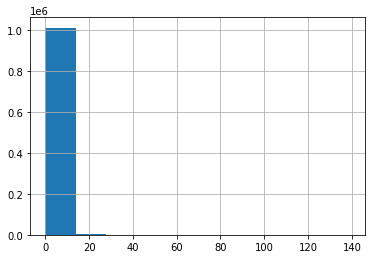

In [255]:
data['DTDISCH_OP'].hist()

In [256]:
data = data[data['DTDISCH_OP'] < 21]

In [257]:
data.shape

(1013554, 95)

In [258]:
data['DISCHARGE_DESTINATION'].value_counts()

Home                            1008607
Facility which was home            1057
Skilled care, not home             1036
Separate Acute Care                 743
Rehab                               557
Expired                             375
Unskilled facility, not home        285
Separate acute care                 155
Name: DISCHARGE_DESTINATION, dtype: int64

In [259]:
print(data.shape)
data = data[data['DISCHARGE_DESTINATION'] != 'Expired']
print(data.shape)
data = data[data['DISCHARGE_DESTINATION'] != 'Separate acute care']
print(data.shape)

(1013554, 95)
(1013179, 95)
(1013024, 95)


In [260]:
data['READ30'].value_counts(dropna=False)

No     965426
Yes     47598
Name: READ30, dtype: int64

In [261]:
data['READ30'].value_counts(normalize=True)

No     0.953014
Yes    0.046986
Name: READ30, dtype: float64

In [262]:
data.head()

,SEX,AGE,CPT,STAPLING_PROC,MOBILITY_DEVICE,MI_ALL_HISTORY,PTC,PCARD,HIP,HYPERLIPIDEMIA,WGT_HIGH_BAR,WGT_CLOSEST,BMI,BMI_HIGH_BAR,HISTORY_DVT,VENOUS_STASIS,DIALYSIS,RENAL_INSUFFICIENCY,THERAPEUTIC_ANTICOAGULATION,PREVIOUS_SURGERY,DIABETES,SMOKER,FUNSTATPRESURG,COPD,OXYGEN_DEPENDENT,HISTORY_PE,SLEEP_APNEA,CHRONIC_STEROIDS,ALBUMIN,HCT,ASSISTANT_TRAINING_LEVEL,SURGICAL_APPROACH,APPROACH_CONVERTED,DRAIN_PLACED,ANASTOMOSIS_CHECKED,ASACLASS,DTOP,DTDISCH_OP,OPYEAR,OPLENGTH,POSTOPDEEPINCISIONALSSI,POSTOPORGANSPACESSI,POSTOPPNEUMONIA,PULMONARYEMBOLSM,POSTOPSEPSIS,POSTOPSEPTICSHOCK,POSTOPSUPERFICIALINCISIONALSSI,TRANSFINTOPPSTOP,POSTOPUTI,WOUNDDISRUPTION,UNPLANNEDADMISSIONICU30,DISCHARGE_DESTINATION,REOP30,READ30,INTV30,DTREAD,DTINTV,DTREOP,CDIFF,DTPOSTOPDEEPINCISIONALSSI,DTPOSTOPORGANSPACESSI,DTPOSTOPPNEUMONIA,DTPOSTOPSEPSIS,DTPOSTOPSEPTICSHOCK,DTPOSTOPUTI,DTWOUNDDISRUPTION,DTPULMONARYEMBOLSM,DTTRANSFINTOPPSTOP,DTCDIFF,CREATININE,HEMO,RACE_PUF,HISPANIC,PROCEDURE_TYPE,NBHTN_MEDS,ROBOTIC_ASST,POSTOPANASTSLLEAK,GITRACTBLEED,BOWELOBSTRUCTION,DTPOSTOPSUPERFINCSSI,DTANASTSLLEAK,DTUNPLANADMICU,DTGITRACTBLEED,DTBOWELOBSTRUCTION,READ_DIAGNOSIS,LOA,EGD,PARAESOPHAGEAL_HERNIA_REPAIR,REMOVAL_GASTRIC_BAND,LAP_CHOLE,NERVE_BLOCK,LIVER_BIOPSY,OMENTUM_FLAP,WEIGHT_DIFFERENCE,CPTLABEL
0,Female,26.0,43644,Yes,No,No,No,No,No,No,203.662808,190.100000,76.49,82.11,No,No,No,No,No,No,No,No,Independent,No,No,No,Yes,No,NaN,34.7,Resident (PGY 1-5+),Laparoscopic,No,Yes,Yes,3-Severe Disturb,0.0,2.0,2015,162.0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,Home,1,Yes,1,22.0,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,13.562808,Roux-en-y
1,Male,47.0,43644,Yes,No,No,No,No,Yes,No,129.000000,125.000000,39.45,40.72,No,No,No,No,No,No,"Yes, insulin",No,Independent,No,No,No,Yes,No,3.8,39.7,Minimally Invasive Surgery Fellow,Laparoscopic,No,Yes,Yes,3-Severe Disturb,0.0,2.0,2015,187.0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,Home,0,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,4.000000,Roux-en-y
2,Female,53.0,43644,Yes,No,No,No,No,No,No,115.000000,113.000000,46.97,47.80,No,No,No,No,No,No,"Yes, non-insulin",No,Independent,No,No,No,No,No,3.8,35.0,Resident (PGY 1-5+),Laparoscopic,No,Yes,Yes,3-Severe Disturb,0.0,2.0,2015,126.0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,Home,0,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,2.000000,Roux-en-y
5,Female,60.0,43644,Yes,No,No,No,No,Yes,No,132.902456,122.469840,47.82,51.90,No,No,No,No,No,No,No,No,Independent,Yes,No,No,Yes,No,NaN,44.1,Resident (PGY 1-5+),Laparoscopic,No,Yes,Yes,3-Severe Disturb,0.0,3.0,2015,131.0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,Home,0,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,10.432616,Roux-en-y
6,Female,50.0,43644,Yes,No,No,No,No,No,Yes,121.109064,119.748288,41.34,41.81,No,No,No,No,No,No,No,No,Independent,No,No,No,No,No,4.7,37.4,Resident (PGY 1-5+),Laparoscopic,No,Yes,Yes,3-Severe Disturb,0.0,3.0,2015,151.0,0,0,0,0.0,0.0,0.0,0,1.0,0,0.0,0.0,Home,0,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1.360776,Roux-en-y


In [263]:
data['ALBUMIN'].isnull().sum()/data.shape[0]

0.2550531872887513

In [264]:
data.reset_index(inplace=True, drop=True)
data.to_feather('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/table1_data.feather')


In [265]:
data = pd.read_feather('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/table1_data.feather')

In [266]:
data.head()

,SEX,AGE,CPT,STAPLING_PROC,MOBILITY_DEVICE,MI_ALL_HISTORY,PTC,PCARD,HIP,HYPERLIPIDEMIA,WGT_HIGH_BAR,WGT_CLOSEST,BMI,BMI_HIGH_BAR,HISTORY_DVT,VENOUS_STASIS,DIALYSIS,RENAL_INSUFFICIENCY,THERAPEUTIC_ANTICOAGULATION,PREVIOUS_SURGERY,DIABETES,SMOKER,FUNSTATPRESURG,COPD,OXYGEN_DEPENDENT,HISTORY_PE,SLEEP_APNEA,CHRONIC_STEROIDS,ALBUMIN,HCT,ASSISTANT_TRAINING_LEVEL,SURGICAL_APPROACH,APPROACH_CONVERTED,DRAIN_PLACED,ANASTOMOSIS_CHECKED,ASACLASS,DTOP,DTDISCH_OP,OPYEAR,OPLENGTH,POSTOPDEEPINCISIONALSSI,POSTOPORGANSPACESSI,POSTOPPNEUMONIA,PULMONARYEMBOLSM,POSTOPSEPSIS,POSTOPSEPTICSHOCK,POSTOPSUPERFICIALINCISIONALSSI,TRANSFINTOPPSTOP,POSTOPUTI,WOUNDDISRUPTION,UNPLANNEDADMISSIONICU30,DISCHARGE_DESTINATION,REOP30,READ30,INTV30,DTREAD,DTINTV,DTREOP,CDIFF,DTPOSTOPDEEPINCISIONALSSI,DTPOSTOPORGANSPACESSI,DTPOSTOPPNEUMONIA,DTPOSTOPSEPSIS,DTPOSTOPSEPTICSHOCK,DTPOSTOPUTI,DTWOUNDDISRUPTION,DTPULMONARYEMBOLSM,DTTRANSFINTOPPSTOP,DTCDIFF,CREATININE,HEMO,RACE_PUF,HISPANIC,PROCEDURE_TYPE,NBHTN_MEDS,ROBOTIC_ASST,POSTOPANASTSLLEAK,GITRACTBLEED,BOWELOBSTRUCTION,DTPOSTOPSUPERFINCSSI,DTANASTSLLEAK,DTUNPLANADMICU,DTGITRACTBLEED,DTBOWELOBSTRUCTION,READ_DIAGNOSIS,LOA,EGD,PARAESOPHAGEAL_HERNIA_REPAIR,REMOVAL_GASTRIC_BAND,LAP_CHOLE,NERVE_BLOCK,LIVER_BIOPSY,OMENTUM_FLAP,WEIGHT_DIFFERENCE,CPTLABEL
0,Female,26.0,43644,Yes,No,No,No,No,No,No,203.662808,190.100000,76.49,82.11,No,No,No,No,No,No,No,No,Independent,No,No,No,Yes,No,NaN,34.7,Resident (PGY 1-5+),Laparoscopic,No,Yes,Yes,3-Severe Disturb,0.0,2.0,2015,162.0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,Home,1,Yes,1,22.0,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0,0,0,0,0,0,0,0,13.562808,Roux-en-y
1,Male,47.0,43644,Yes,No,No,No,No,Yes,No,129.000000,125.000000,39.45,40.72,No,No,No,No,No,No,"Yes, insulin",No,Independent,No,No,No,Yes,No,3.8,39.7,Minimally Invasive Surgery Fellow,Laparoscopic,No,Yes,Yes,3-Severe Disturb,0.0,2.0,2015,187.0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,Home,0,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0,0,0,0,0,0,0,0,4.000000,Roux-en-y
2,Female,53.0,43644,Yes,No,No,No,No,No,No,115.000000,113.000000,46.97,47.80,No,No,No,No,No,No,"Yes, non-insulin",No,Independent,No,No,No,No,No,3.8,35.0,Resident (PGY 1-5+),Laparoscopic,No,Yes,Yes,3-Severe Disturb,0.0,2.0,2015,126.0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,Home,0,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0,0,0,0,0,0,1,0,2.000000,Roux-en-y
3,Female,60.0,43644,Yes,No,No,No,No,Yes,No,132.902456,122.469840,47.82,51.90,No,No,No,No,No,No,No,No,Independent,Yes,No,No,Yes,No,NaN,44.1,Resident (PGY 1-5+),Laparoscopic,No,Yes,Yes,3-Severe Disturb,0.0,3.0,2015,131.0,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,Home,0,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0,0,0,0,0,0,0,0,10.432616,Roux-en-y
4,Female,50.0,43644,Yes,No,No,No,No,No,Yes,121.109064,119.748288,41.34,41.81,No,No,No,No,No,No,No,No,Independent,No,No,No,No,No,4.7,37.4,Resident (PGY 1-5+),Laparoscopic,No,Yes,Yes,3-Severe Disturb,0.0,3.0,2015,151.0,0,0,0,0.0,0.0,0.0,0,1.0,0,0.0,0.0,Home,0,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0,0,0,0,0,0,0,0,1.360776,Roux-en-y


In [267]:
data.drop(['READ_DIAGNOSIS', 'DTREAD'], axis=1, inplace=True)
data.drop(dpost_op, axis=1, inplace=True)

In [268]:
num_cols = ['ALBUMIN', 'HCT', 'OPLENGTH', 'AGE','BMI','BMI_HIGH_BAR','WGT_HIGH_BAR','WGT_CLOSEST','WEIGHT_DIFFERENCE']
imputer = SimpleImputer(strategy='median')
for x in num_cols:
    data[x] = imputer.fit_transform(data[x].values.reshape(-1,1))

In [269]:
data['OPYEAR'].value_counts(dropna=False)

2019    184307
2018    181847
2017    176936
2016    163353
2020    160141
2015    146440
Name: OPYEAR, dtype: int64

In [270]:
cat_cols = list(set(data.columns) - set(num_cols))
cat_cols.remove('OPYEAR')
cat_imputer = SimpleImputer(strategy='most_frequent')
for x in cat_cols:
    data[x] = cat_imputer.fit_transform(data[x].values.reshape(-1,1))

In [271]:
le = LabelEncoder()
for x in cat_cols:
    data[x] = le.fit_transform(data[x])

In [272]:
data.head()

,SEX,AGE,CPT,STAPLING_PROC,MOBILITY_DEVICE,MI_ALL_HISTORY,PTC,PCARD,HIP,HYPERLIPIDEMIA,WGT_HIGH_BAR,WGT_CLOSEST,BMI,BMI_HIGH_BAR,HISTORY_DVT,VENOUS_STASIS,DIALYSIS,RENAL_INSUFFICIENCY,THERAPEUTIC_ANTICOAGULATION,PREVIOUS_SURGERY,DIABETES,SMOKER,FUNSTATPRESURG,COPD,OXYGEN_DEPENDENT,HISTORY_PE,SLEEP_APNEA,CHRONIC_STEROIDS,ALBUMIN,HCT,ASSISTANT_TRAINING_LEVEL,SURGICAL_APPROACH,APPROACH_CONVERTED,DRAIN_PLACED,ANASTOMOSIS_CHECKED,ASACLASS,DTOP,OPYEAR,OPLENGTH,POSTOPDEEPINCISIONALSSI,POSTOPORGANSPACESSI,POSTOPPNEUMONIA,PULMONARYEMBOLSM,POSTOPSEPSIS,POSTOPSEPTICSHOCK,POSTOPSUPERFICIALINCISIONALSSI,TRANSFINTOPPSTOP,POSTOPUTI,WOUNDDISRUPTION,UNPLANNEDADMISSIONICU30,DISCHARGE_DESTINATION,REOP30,READ30,INTV30,CDIFF,CREATININE,HEMO,RACE_PUF,HISPANIC,PROCEDURE_TYPE,NBHTN_MEDS,ROBOTIC_ASST,POSTOPANASTSLLEAK,GITRACTBLEED,BOWELOBSTRUCTION,LOA,EGD,PARAESOPHAGEAL_HERNIA_REPAIR,REMOVAL_GASTRIC_BAND,LAP_CHOLE,NERVE_BLOCK,LIVER_BIOPSY,OMENTUM_FLAP,WEIGHT_DIFFERENCE,CPTLABEL
0,0,26.0,4,1,0,0,0,0,0,0,203.662808,190.100000,76.49,82.11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.1,34.7,5,0,0,1,1,2,0,2015,162.0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,93,103,8,3,3,4,2,0,0,0,0,0,0,0,0,0,0,0,13.562808,1
1,1,47.0,4,1,0,0,0,0,1,0,129.000000,125.000000,39.45,40.72,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.8,39.7,2,0,0,1,1,2,0,2015,187.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,93,103,8,3,3,4,2,0,0,0,0,0,0,0,0,0,0,0,4.000000,1
2,0,53.0,4,1,0,0,0,0,0,0,115.000000,113.000000,46.97,47.80,0,0,0,0,0,0,2,0,0,0,0,0,0,0,3.8,35.0,5,0,0,1,1,2,0,2015,126.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,93,103,8,3,3,4,2,0,0,0,0,0,0,0,0,0,1,0,2.000000,1
3,0,60.0,4,1,0,0,0,0,1,0,132.902456,122.469840,47.82,51.90,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4.1,44.1,5,0,0,1,1,2,0,2015,131.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,93,103,8,3,3,4,2,0,0,0,0,0,0,0,0,0,0,0,10.432616,1
4,0,50.0,4,1,0,0,0,0,0,1,121.109064,119.748288,41.34,41.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.7,37.4,5,0,0,1,1,2,0,2015,151.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,93,103,8,3,3,4,2,0,0,0,0,0,0,0,0,0,0,0,1.360776,1


In [273]:
scaler = StandardScaler()
for x in num_cols:
    data[x] = scaler.fit_transform(data[x].values.reshape(-1,1))

In [274]:
data['OPYEAR'].value_counts(normalize=True)

2019    0.181937
2018    0.179509
2017    0.174661
2016    0.161253
2020    0.158082
2015    0.144557
Name: OPYEAR, dtype: float64

In [275]:
test = data[data['OPYEAR'] > 2018]
train = data[data['OPYEAR'] < 2019]
print(test.shape, train.shape)

(344448, 75) (668576, 75)


In [276]:
test.reset_index(inplace=True)
train.reset_index(inplace=True)
test.to_feather('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/test.feather')
train.to_feather('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/train.feather')

train = pd.read_feather('data/train.feather')
test = pd.read_feather('data/test.feather')
print(train.shape, test.shape)

In [277]:
post_op.append('index')
# post_op.append('DTDISCH_OP')

In [278]:
train['OPYEAR'].value_counts()

2018    181847
2017    176936
2016    163353
2015    146440
Name: OPYEAR, dtype: int64

In [279]:
train3 = train[train['OPYEAR'] != 2015]
train3.reset_index(inplace=True, drop=True)
train3.to_feather('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/train.feather')

In [280]:
train.drop(post_op, axis=1, inplace=True)
test.drop(post_op, axis=1, inplace=True)

/var/folders/5n/nj9s10v14nvccchdnmlzcdwr0000gn/T/ipykernel_7728/2575471411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(post_op, axis=1, inplace=True)
/var/folders/5n/nj9s10v14nvccchdnmlzcdwr0000gn/T/ipykernel_7728/2575471411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(post_op, axis=1, inplace=True)


In [281]:
test.to_feather('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/test_nopost.feather')
train.to_feather('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/train_nopost.feather')

In [282]:
train5 = train[train['OPYEAR'] != 2015]
print(train5.shape, test.shape)

(522136, 58) (344448, 58)


In [283]:
train5.to_csv('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/train_nopost.csv', index=False)
test.to_csv('/Users/loganbutler/Downloads/Python_Data_MBSAQIP/dataoutput_wd/test_nopost.csv', index=False)

In [284]:
data.columns

Index(['SEX', 'AGE', 'CPT', 'STAPLING_PROC', 'MOBILITY_DEVICE',
       'MI_ALL_HISTORY', 'PTC', 'PCARD', 'HIP', 'HYPERLIPIDEMIA',
       'WGT_HIGH_BAR', 'WGT_CLOSEST', 'BMI', 'BMI_HIGH_BAR', 'HISTORY_DVT',
       'VENOUS_STASIS', 'DIALYSIS', 'RENAL_INSUFFICIENCY',
       'THERAPEUTIC_ANTICOAGULATION', 'PREVIOUS_SURGERY', 'DIABETES', 'SMOKER',
       'FUNSTATPRESURG', 'COPD', 'OXYGEN_DEPENDENT', 'HISTORY_PE',
       'SLEEP_APNEA', 'CHRONIC_STEROIDS', 'ALBUMIN', 'HCT',
       'ASSISTANT_TRAINING_LEVEL', 'SURGICAL_APPROACH', 'APPROACH_CONVERTED',
       'DRAIN_PLACED', 'ANASTOMOSIS_CHECKED', 'ASACLASS', 'DTOP', 'OPYEAR',
       'OPLENGTH', 'POSTOPDEEPINCISIONALSSI', 'POSTOPORGANSPACESSI',
       'POSTOPPNEUMONIA', 'PULMONARYEMBOLSM', 'POSTOPSEPSIS',
       'POSTOPSEPTICSHOCK', 'POSTOPSUPERFICIALINCISIONALSSI',
       'TRANSFINTOPPSTOP', 'POSTOPUTI', 'WOUNDDISRUPTION',
       'UNPLANNEDADMISSIONICU30', 'DISCHARGE_DESTINATION', 'REOP30', 'READ30',
       'INTV30', 'CDIFF', 'CREATININE', 'HE